# Aula 14 - Árvores

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Árvores de decisão
- 3) Árvores de regressão

<img src="https://miro.medium.com/max/899/0*Wy3QjtXL9qf-Ssyz.jpg" width=800>

###  

## Exercícios 1 - Dados Imobiliários

In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

Vamos fazer o exercício onde usamos os dados imobiliários do *SKLearn*:

In [2]:
from sklearn.datasets import load_boston
dados = load_boston()
X = pd.DataFrame(data=dados['data'], columns=dados['feature_names'])
y = pd.Series(data=dados['target'],name='price')

In [3]:
X.shape

(506, 13)

In [4]:
print(dados['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

In [6]:
quantile_25 = np.quantile(y, 0.25)
quantile_25

17.025

In [7]:
quantile_50 = np.quantile(y, 0.50)
quantile_50

21.2

In [8]:
quantile_75 = np.quantile(y, 0.75)
quantile_75

25.0

In [9]:
classes_y = np.where(y < quantile_25, 0, np.where(y < quantile_50, 1, np.where(y < quantile_75, 2, 3)))

In [10]:
classes_y

array([2, 2, 3, 3, 3, 3, 2, 3, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 2,
       2, 1, 1, 0, 0, 1, 1, 1, 3, 2, 1, 3, 2, 3, 2, 1, 1, 0, 2, 3, 3, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1,
       2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       0, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 1, 2, 3, 2,

## 

## Parte 2 - Modelagem

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    classes_y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=classes_y)

Usando o **DecisionTree**:

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Instancie o modelo

model = DecisionTreeClassifier(random_state = 42)

In [14]:
# Fit do Modelo

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Predict do Modelo

y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.59      0.59      0.59        37
           2       0.65      0.59      0.62        37
           3       0.74      0.78      0.76        40

    accuracy                           0.69       152
   macro avg       0.69      0.69      0.69       152
weighted avg       0.69      0.69      0.69       152



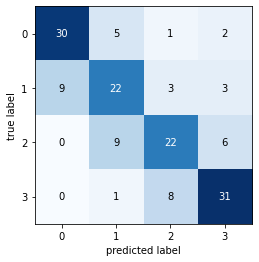

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

Para os modelos de árvores, conseguimos plotar como que fica a quebra nos Nós:

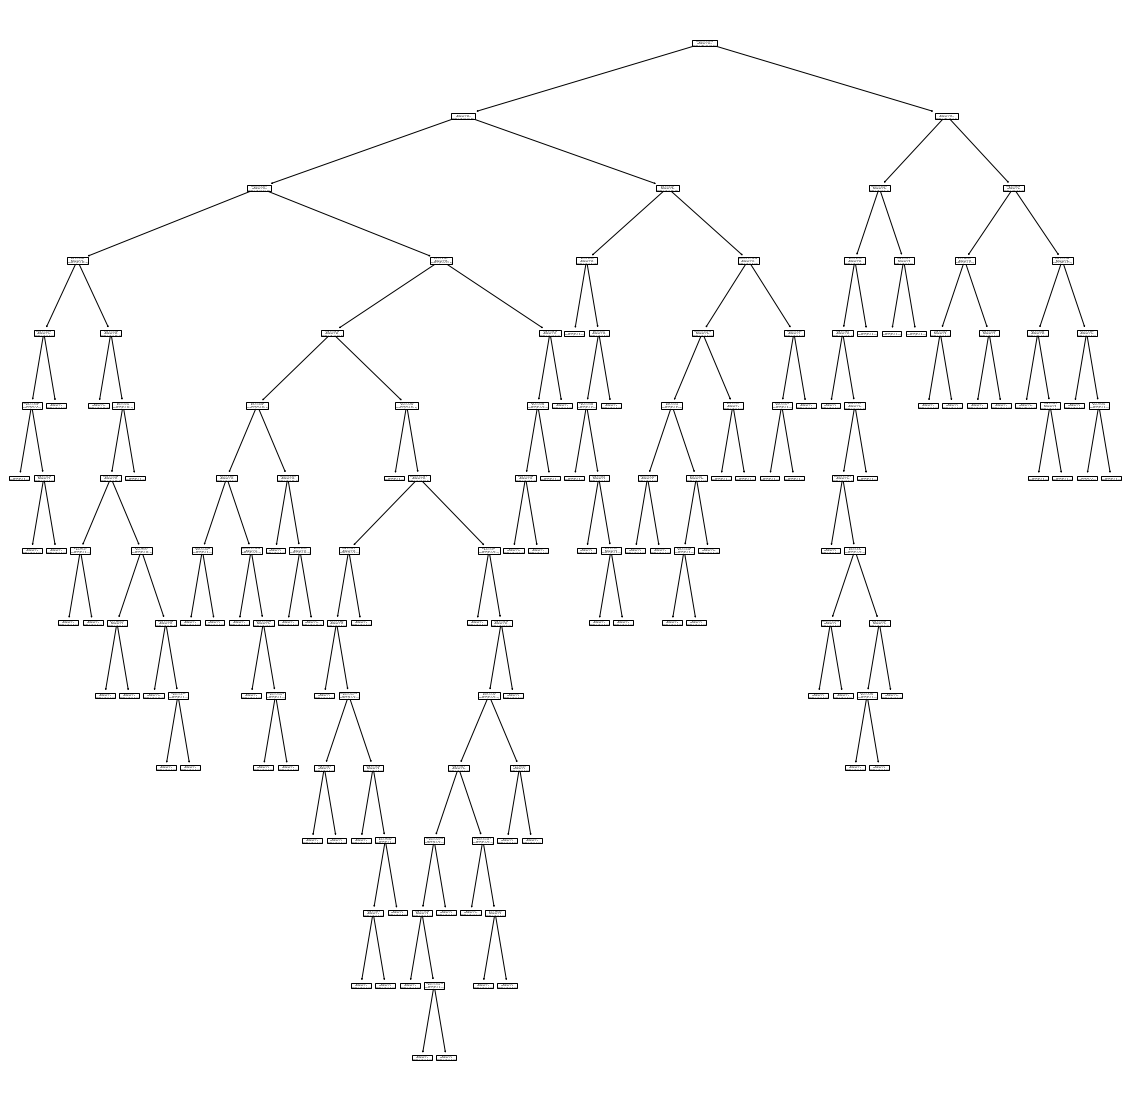

In [18]:
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=X_train.columns)
plt.show()

Faz definir um limite de profundidade para visualizarmos melhor e ver como que o modelo vai render de acordo com isso:

In [19]:
# Instancie o modelo

model = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.48      0.62      0.54        37
           2       0.58      0.41      0.48        37
           3       0.86      0.80      0.83        40

    accuracy                           0.66       152
   macro avg       0.67      0.66      0.66       152
weighted avg       0.67      0.66      0.66       152



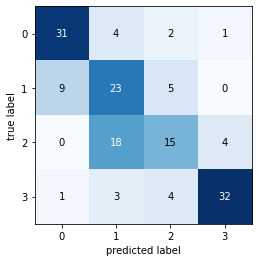

In [23]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

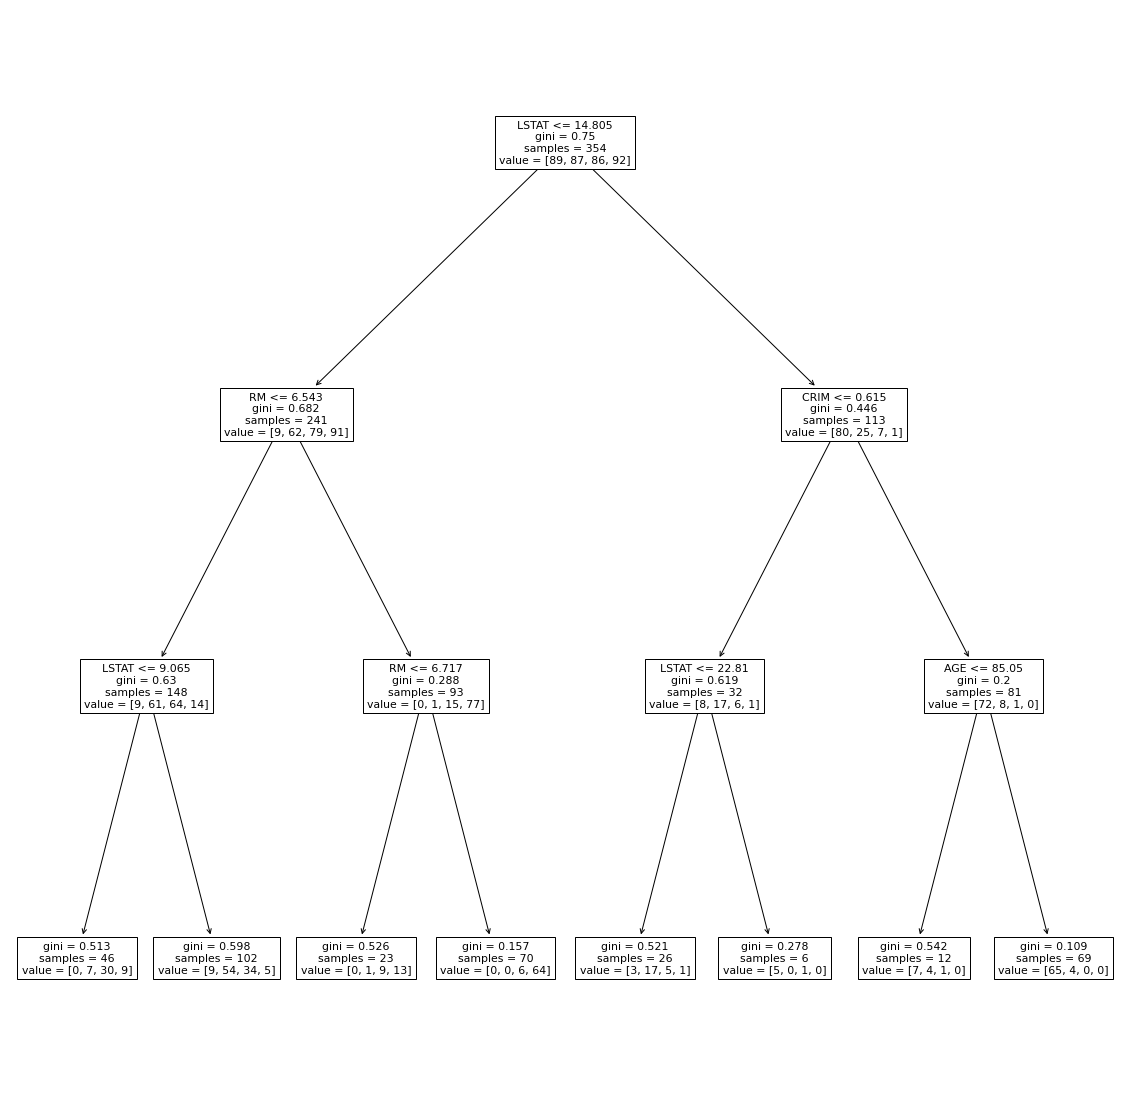

In [24]:
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=X_train.columns)
plt.show()

Usando a __Regressão Logística__:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [26]:
# instancia da normalização
std = StandardScaler()

In [27]:
# Aplicando a Normalização
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [28]:
reglog = LogisticRegression()

In [29]:
reglog.fit(X_train_std, y_train)

LogisticRegression()

In [30]:
y_pred_reglog = reglog.predict(X_test_std)

In [31]:
print(classification_report(y_test, y_pred_reglog))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.59      0.51      0.55        37
           2       0.62      0.70      0.66        37
           3       0.89      0.80      0.84        40

    accuracy                           0.72       152
   macro avg       0.72      0.71      0.71       152
weighted avg       0.72      0.72      0.72       152



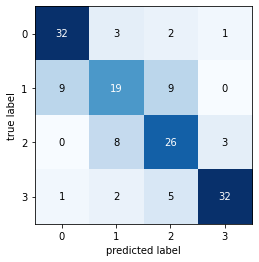

In [32]:
cm_reglog = confusion_matrix(y_test, y_pred_reglog)

plot_confusion_matrix(conf_mat=cm_reglog)
plt.show()

## 

## Exercício 2 - Base Insurance

In [33]:
# Imports utilizados em todos os exercícios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import da biblioteca warnings para ignorar eventuais warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
insurance = pd.read_csv('./datasets/insurance.csv')

In [35]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
insurance['sexo'] = np.where(insurance['sex'] == 'male', 1, 0)
insurance['fumante'] = np.where(insurance['smoker'] == 'yes', 1, 0)

In [38]:
insurance

,age,sex,bmi,children,smoker,region,charges,sexo,fumante
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [39]:
insurance.drop(['sex', 'smoker'], axis = 1, inplace = True)

In [40]:
insurance.head()

,age,bmi,children,region,charges,sexo,fumante
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [41]:
insurance_dummies = pd.get_dummies(insurance, 
                                   prefix_sep = '_', 
                                   columns = ['region'], 
                                   drop_first = True)

In [42]:
insurance_dummies

,age,bmi,children,charges,sexo,fumante,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [43]:
insurance.shape

(1338, 7)

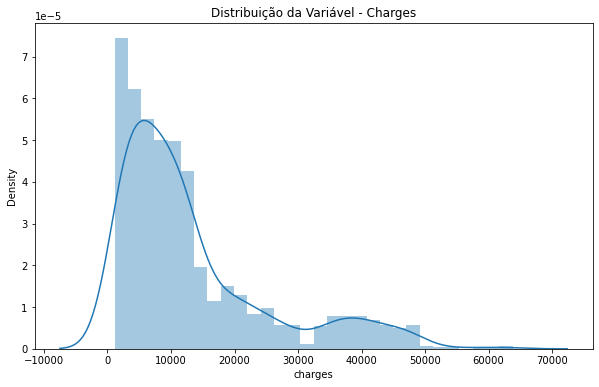

In [44]:
# Dimensiona a figura do gráfico
plt.figure(figsize=(10,6))

# Plot da distribuição da resposta
sns.distplot(insurance_dummies["charges"], kde=True)

# Determina um titulo para o gráfico
plt.title('Distribuição da Variável - Charges')

# Mostra o Gráfico
plt.show()

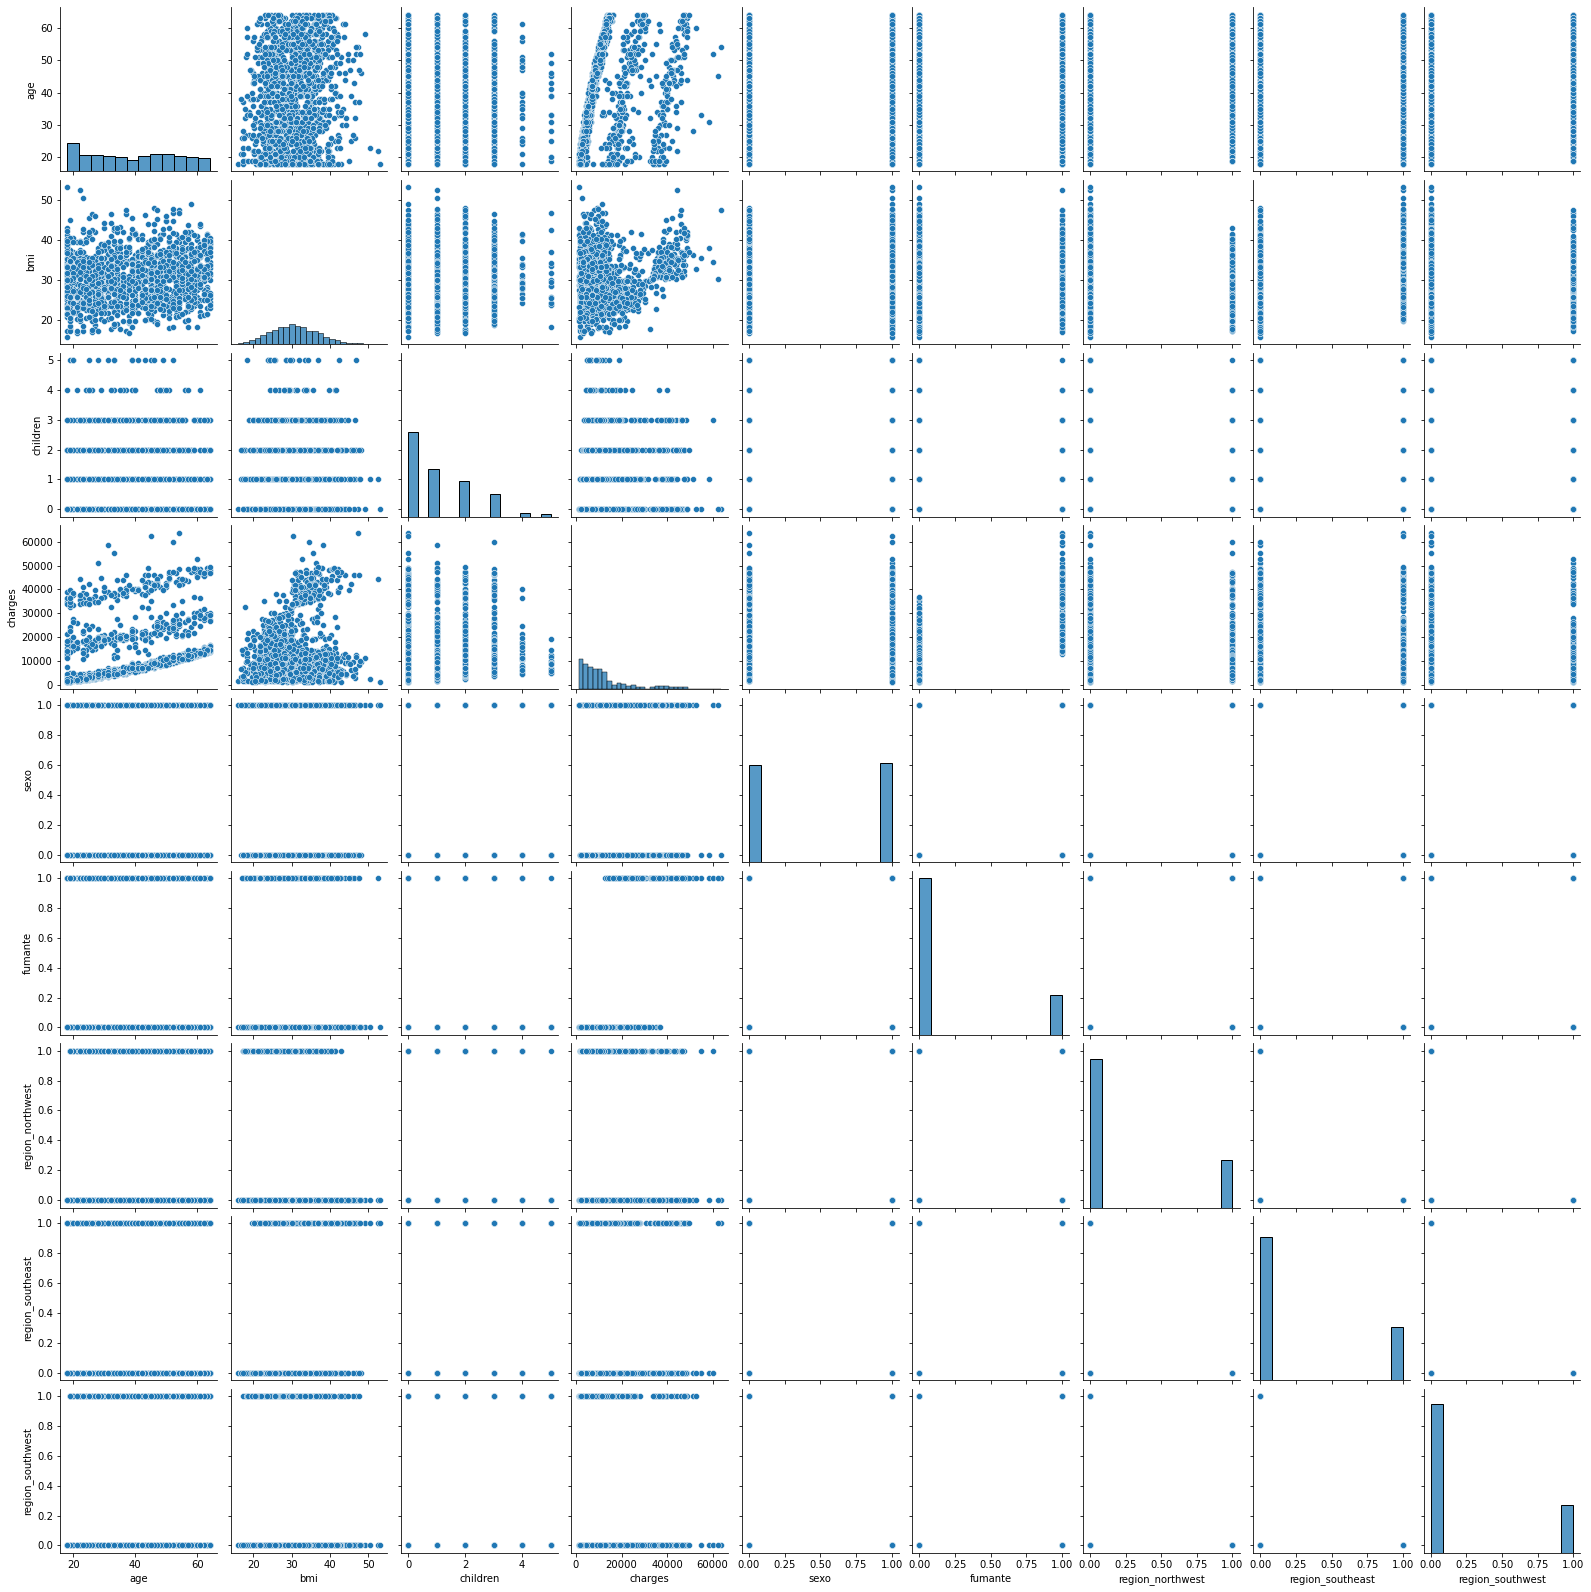

In [45]:
# Pairplot das Variáveis
sns.pairplot(insurance_dummies)

# Mostra o gráfico
plt.show()

In [46]:
# Separação dos dados entre variáveis e resposta
X = insurance_dummies.drop(['charges'], axis = 1)
y = insurance_dummies['charges']

In [47]:
# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

Usando a __Regressão Linear__:

In [48]:
# Define como será feito a normalização
scaler = StandardScaler()

In [49]:
# Normalizando os dados de treino e teste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [50]:
# Define o modelo de Regressão linear
linreg = LinearRegression()

In [51]:
# Fit do modelo
linreg.fit(X_train_std, y_train)

LinearRegression()

In [52]:
# Fazendo as predições
y_pred = linreg.predict(X_test_std)

In [53]:
# Visualizando as predições
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

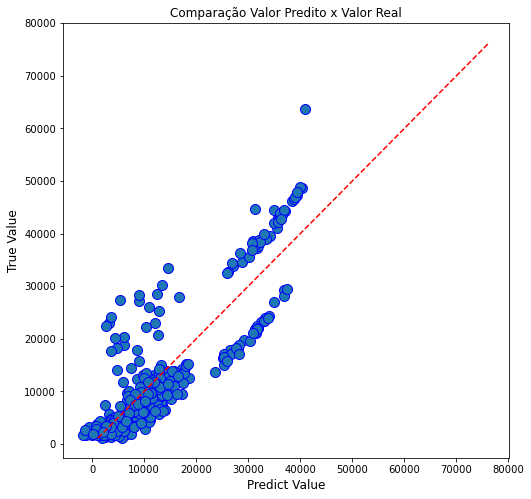

In [54]:
# Configurações do Gráfico comparativo
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# Mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl

# Plot do gráfico comparando ambos o teste e as predições
plt.plot(xl, yl, 'r--')

# Mostra o gráfico
plt.show()

In [55]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    4145.451
Erro Quadrãtico Médio:  33780509.575
R^2:                    0.77


Usando a __Árvore de Regressão__:

In [56]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

In [57]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
y_pred_tree = model.predict(X_test)

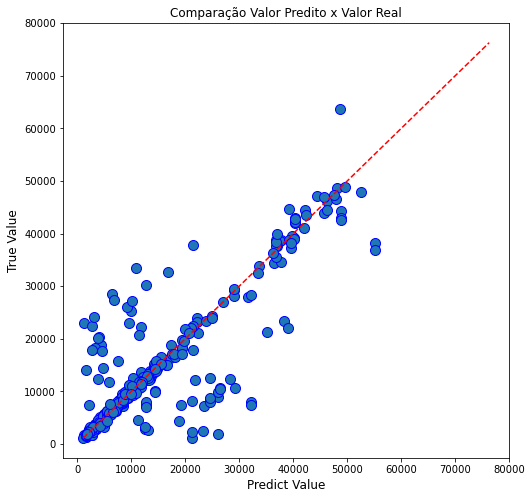

In [59]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred_tree, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

In [60]:
# Print das Métricas
print('Métricas para a Previsão:')
print('Erro Absoluto Médio:   ', np.round(mean_absolute_error(y_test, y_pred_tree), 3))
print('Erro Quadrãtico Médio: ', np.round(mean_squared_error(y_test, y_pred_tree), 3))
print('R^2:                   ', np.round(r2_score(y_test, y_pred_tree), 3))

Métricas para a Previsão:
Erro Absoluto Médio:    2821.185
Erro Quadrãtico Médio:  38314825.084
R^2:                    0.739
